In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/Boston.csv


In [0]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('/kaggle/input/boston-housing-dataset/Boston.csv')

In [0]:
data.shape

(506, 14)

In [0]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [0]:
data.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

### Observation:
### --> Most of them have a correlation of around + or - 0.5 with the target variable

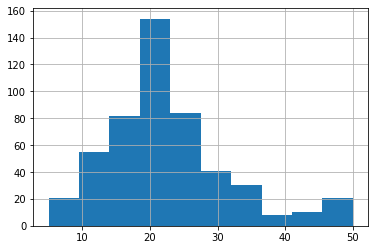

In [0]:
data['medv'].hist()

# Remove Outliers

In [0]:
((data['medv']>=(data['medv'].mean() - 3 * data['medv'].std())) \
                          & (data['medv']<=(data['medv'].mean() + 3 * data['medv'].std()))).sum()

506

### --> All the points are within the outlier limit

In [0]:
X = data.drop('medv',axis = 1)
y = data['medv']

# Check multicollinearity

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [0]:
X_drop_1 = X.drop(['nox','rm','tax','ptratio','age','black'],axis = 1)

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_drop_1.values, i) for i in range(X_drop_1.shape[1])]
vif["features"] = X_drop_1.columns

vif

,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


### --> Multi-collinearity is required from statistical point of view but not from accuracy point of view.
### --> We will ignore handling multi-collinearity for now.


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3, test_size = 0.3)

In [0]:
X_train.shape

(354, 13)

# Removing influence points

In [0]:
import statsmodels.api as sm

In [0]:
model = sm.OLS(y_train,X_train)
regr = model.fit()

In [0]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              636.1
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   4.75e-230
Time:                        05:57:57   Log-Likelihood:                         -1062.7
No. Observations:                 354   AIC:                                      2151.
Df Residuals:                     341   BIC:                                      2202.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1298      0.037     -3.471      0.001      -0.203      -0.056
zn             0.0479      0.018      2.696      0.007       0.013       0.083
indus         -0.0647      0.078     -0.828      0.408      -0.218       0.089
chas           3.9233      1.062      3.693      0.000       1.834       6.013
nox           -0.2740      3.927     -0.070      0.944      -7.999       7.451
rm             5.4133      0.372     14.563      0.000       4.682       6.145
age            0.0015      0.017      0.088      0.930      -0.031       0.034
dis           -0.8123      0.225     -3.618      0.000      -1.254      -0.371
rad            0.1847      0.078      2.367      0.019       0.031       0.338
tax           -0.0057      0.005     -1.220      0.223      -0.015       0.003
ptratio       -0.3981      0.134     -2.969      0.003      -0.662      -0.134
black          0.0173      0.003      5.349      0.000       0.011       0.024
lstat         -0.4865      0.062     -7.878      0.000      -0.608      -0.365
==============================================================================
Omnibus:                      142.244   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.640
Skew:                           1.606   Prob(JB):                    8.33e-170
Kurtosis:                       9.517   Cond. No.                     8.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

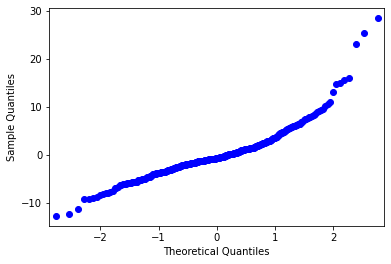

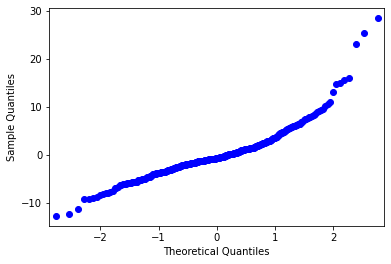

In [0]:
#qqpolot vs. normal distribution
sm.qqplot(regr.resid)

### --> Normality of errors is also required from statistical inference point of view

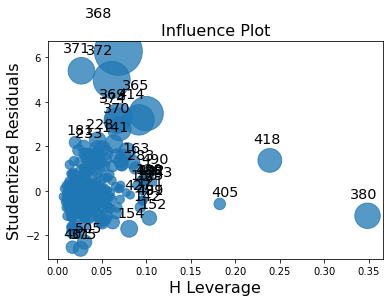

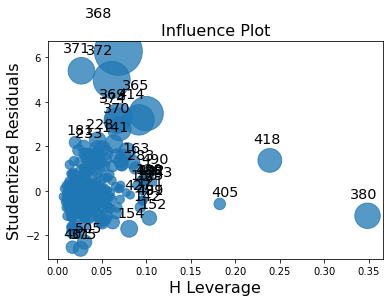

In [0]:
#graphical representation of the influences()
sm.graphics.influence_plot(regr)

### --> There are quite a few influence points

# Influence points based on outlier criteria

In [0]:
regr.outlier_test()

,student_resid,unadj_p,bonf(p)
359,0.033368,0.973400,1.000000
374,3.155229,0.001747,0.618404
98,1.618956,0.106384,1.000000
273,-0.552729,0.580812,1.000000
329,-0.334445,0.738250,1.000000
...,...,...,...
440,-0.815449,0.415386,1.000000
131,-0.392208,0.695150,1.000000
249,0.041243,0.967127,1.000000
152,-1.223930,0.221826,1.000000


In [0]:
(regr.outlier_test()['student_resid'] > 3).sum()

7

In [0]:
(regr.outlier_test()['student_resid'] < -3).sum()

0

In [0]:
outlier_upp = regr.outlier_test()['student_resid'] > 3

In [0]:
outlier_low = regr.outlier_test()['student_resid'] < -3

In [0]:
outlier = np.logical_or(outlier_low, outlier_upp)

# Influence points based on Leverage Statistic

In [0]:
infl = regr.get_influence()
infl

In [0]:
leviers = infl.hat_matrix_diag #leverage
leviers[:10]

array([0.02900116, 0.0668746 , 0.03593382, 0.05134291, 0.05648497,
       0.02588316, 0.07417012, 0.02763276, 0.06873466, 0.0158589 ])

In [0]:
high_lev = leviers>0.08

In [0]:
influ_pts = np.logical_or(outlier, high_lev)

In [0]:
influ_index = X_train.index[influ_pts]

In [0]:
X_train = X_train.drop(influ_index)

In [0]:
y_train = y_train.drop(influ_index)

In [0]:
model = sm.OLS(y_train,X_train)
regr = model.fit()

In [0]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              993.3
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   3.63e-246
Time:                        05:58:01   Log-Likelihood:                         -894.10
No. Observations:                 327   AIC:                                      1814.
Df Residuals:                     314   BIC:                                      1863.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2177      0.066     -3.283      0.001      -0.348      -0.087
zn             0.0228      0.014      1.572      0.117      -0.006       0.051
indus         -0.0702      0.074     -0.952      0.342      -0.215       0.075
chas           2.3986      0.938      2.556      0.011       0.552       4.245
nox           -0.6833      3.534     -0.193      0.847      -7.636       6.269
rm             6.5219      0.319     20.477      0.000       5.895       7.149
age           -0.0315      0.013     -2.390      0.017      -0.058      -0.006
dis           -0.7927      0.181     -4.369      0.000      -1.150      -0.436
rad            0.1885      0.082      2.311      0.021       0.028       0.349
tax           -0.0089      0.005     -1.832      0.068      -0.018       0.001
ptratio       -0.6905      0.108     -6.404      0.000      -0.903      -0.478
black          0.0158      0.003      5.934      0.000       0.011       0.021
lstat         -0.2646      0.056     -4.714      0.000      -0.375      -0.154
==============================================================================
Omnibus:                       59.778   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.650
Skew:                           0.893   Prob(JB):                     1.74e-31
Kurtosis:                       5.684   Cond. No.                     9.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

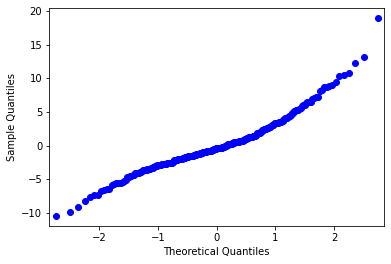

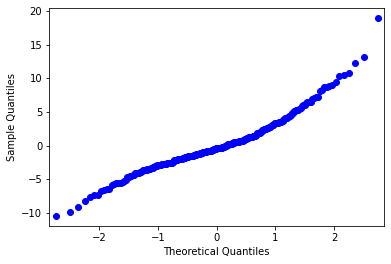

In [0]:
#qqpolot vs. normal distribution
sm.qqplot(regr.resid)

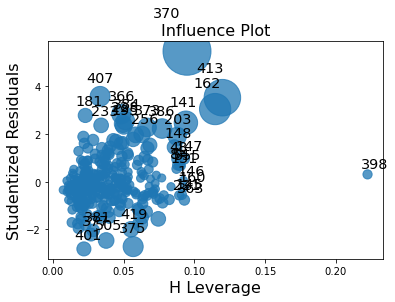

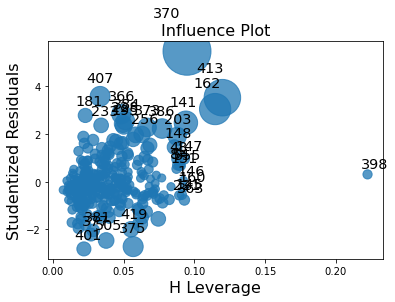

In [0]:
#graphical representation of the influences()
sm.graphics.influence_plot(regr)

# Best Subset Selection

In [0]:
import itertools

In [0]:
import time

In [0]:
import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin

class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

In [0]:
from sklearn.model_selection import cross_val_score

### Function to build model using CV

In [0]:
def processSubsetCV(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    w_model = SMWrapper(sm.OLS)
    scores = cross_val_score(w_model, X_train[list(feature_set)], y_train, cv=5, scoring = 'neg_mean_squared_error')
    print(scores.mean())
#     regr = model.fit()
#     RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"neg_MSE":scores.mean(),"STD": scores.std(),"features": model.exog_names}

### Function to produce combinations of features for a given number of features

In [0]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubsetCV(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    print(models)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['neg_MSE'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

### Get best model from each number of features

In [0]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["neg_MSE", "STD","features"])

tic = time.time()
for i in range(1,X_train.shape[1]+1):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

-56.02412130488701
-64.01833018617086
-50.8060413281421
-72.06705412014685
-58.45838965008868
-31.913056437696174
-61.642626969269585
-69.62971040343636
-59.30573341976809
-53.83399543225389
-52.50770099256848
-64.96474161153716
-31.29186460129184
      neg_MSE        STD   features
0  -56.024121   9.902832     [crim]
1  -64.018330  12.690962       [zn]
2  -50.806041   6.361167    [indus]
3  -72.067054  12.181195     [chas]
4  -58.458390  11.909386      [nox]
5  -31.913056   8.104486       [rm]
6  -61.642627  12.795317      [age]
7  -69.629710  11.735125      [dis]
8  -59.305733   8.158116      [rad]
9  -53.833995   6.081149      [tax]
10 -52.507701   5.296238  [ptratio]
11 -64.964742  10.054317    [black]
12 -31.291865   6.382370    [lstat]
Processed 13 models on 1 predictors in 0.5968196392059326 seconds.
-51.178521499934774
-47.685108582470846
-54.679154595122625
-52.807976336326576
-25.226507368022613
-53.25660061630119
-57.247848634486196
-55.45600109077471
-52.22176808034618
-44.

-29.258690941217356
-47.90981998175734
-25.22894090767132
-30.60896001100432
-43.25150256204364
-51.28559001206732
-30.04562012809273
-46.49923813593856
-25.653870775877675
-31.093360032758017
-44.05140200339905
-25.69209506545995
-30.520760401033613
-25.421866592468447
       neg_MSE        STD                 features
0   -46.959214   8.909112        [crim, zn, indus]
1   -49.178344  13.068029         [crim, zn, chas]
2   -50.343132  11.283419          [crim, zn, nox]
3   -24.838266   6.107334           [crim, zn, rm]
4   -50.868287  10.972580          [crim, zn, age]
..         ...        ...                      ...
281 -31.093360   6.201135      [rad, black, lstat]
282 -44.051402   4.137429    [tax, ptratio, black]
283 -25.692095   6.565146    [tax, ptratio, lstat]
284 -30.520760   5.893871      [tax, black, lstat]
285 -25.421867   6.516809  [ptratio, black, lstat]

[286 rows x 3 columns]
Processed 286 models on 3 predictors in 14.349554061889648 seconds.
-44.444453951632646
-47.2

-24.92068924386006
-28.734198766453005
-41.73213629574946
-46.67007136939737
-29.629962927909965
-45.53706983627877
-25.96849775976486
-30.860896442702483
-43.16521339039788
-26.015019226037474
-30.32092757478909
-25.747825262316063
-25.256114183592135
-47.50399521120624
-46.43939750241434
-48.270097076760365
-47.771765235720885
-39.67269508078333
-47.0774146353567
-28.301972236976848
-24.32619274231754
-25.111194406700843
-23.968965085109474
-23.61062853291395
-21.813492744554694
-22.521170207573004
-20.455007264955523
-43.95868296757033
-47.43542739283988
-46.86854022321181
-39.337673183058435
-46.260121210558836
-28.62570054519506
-47.23142395905505
-46.850209148571125
-40.04858663635531
-46.11117451084859
-26.995189356274842
-47.299790163263275
-39.85050623578418
-46.93975387357513
-29.425194323586616
-39.902358146163074
-46.574800072678656
-29.294104616730188
-38.81540546377706
-24.685808396078457
-29.133030481317213
-25.63715146438272
-25.7715327938376
-25.091506498002587
-24.424

-30.47171476412593
-23.940558003163385
-48.4137552820055
-44.44613307801473
-48.54748702579593
-47.02636734120798
-40.53654624502527
-46.82205650706398
-29.733883749537604
-23.443655318117315
-24.243529267246224
-23.683106261834908
-22.81873276291276
-21.543449413603085
-21.310714687390075
-20.610844943462997
-46.22249718372835
-48.73303610420861
-46.7677479631365
-41.59196203253639
-46.80388621073422
-29.218229009389773
-48.82235499830124
-45.55703736054174
-43.578983969373375
-46.642729611646466
-27.752903780127752
-44.10607684789079
-43.10992957131968
-47.323414266279954
-29.903917431977966
-42.15494234240198
-45.94148294346661
-29.48095752255701
-40.855768167209
-25.351467654668905
-29.774969256702406
-24.271303551270968
-23.556126084988314
-24.442446888528995
-23.50555189211922
-21.209936686500747
-21.856690674304073
-21.24609597016819
-44.516868273116955
-50.71172296089734
-48.789673491986
-41.50352447309938
-48.647631255311936
-30.114820201117936
-45.86175641372923
-44.272686755

-29.44930004881647
-40.19972570536568
-25.277615671430205
-30.36422537310721
-38.79991763195541
-46.90027265057527
-29.739654712704237
-40.509253943886876
-25.605698743786746
-31.002232039177564
-41.28236633309035
-25.74450289765083
-30.435484626143204
-25.56793628265337
-41.17712039019362
-48.75369892132567
-28.842454264270874
-43.64211950771705
-25.289873784144916
-30.131230693164234
-43.75405345513593
-25.24111177573069
-29.41193553143956
-25.07786314949403
-38.27389099340085
-24.637706316487193
-29.99331648575362
-25.286783950843805
-25.769280513466992
-25.40045943266093
-47.329486033714225
-43.84981801664916
-47.48237595045557
-46.50360901864897
-40.09840380159541
-46.29463485120756
-28.109798227521555
-24.51130549189884
-24.98713943614414
-23.99955821282879
-23.425683599222555
-21.98351735031706
-22.567152219634146
-20.596650231830267
-42.422266896550504
-47.12783278633778
-46.22892670900522
-39.76885624233194
-45.91888806346142
-28.160202439880397
-44.5397777843301
-43.545460038

-40.11319665596578
-46.316177754232385
-27.208102086955098
-40.153341086128336
-46.06369086974329
-27.106020364520436
-39.036075019715824
-23.33157206441423
-26.96802160228298
-39.33476049018774
-46.45960140318268
-29.21030754148682
-38.582830337459086
-24.302455894943428
-29.404106990578363
-38.944149641565915
-24.66632870158636
-29.311849833136655
-24.655970658337772
-24.091255990450485
-24.316483947089623
-23.504648553692775
-21.852173864388703
-22.614950690284267
-21.12470410469972
-24.760555076655805
-24.2788114891214
-21.529458178268612
-22.93205916985241
-20.351199583390702
-24.548003085302096
-22.229837293957875
-23.019695861430197
-20.79285540307175
-21.72487229734
-22.49625268250592
-20.27335633887396
-19.859476316610902
-18.29725520988755
-19.898738730290237
-46.219099639669025
-45.55775530027749
-37.47453330420756
-44.858431191109574
-27.957075437541125
-48.81255107630204
-40.90967914983092
-49.28721837714055
-29.506521201354804
-41.222303314875134
-48.59977981716561
-29.26

-45.13902092941745
-45.175469609258826
-39.23818632662873
-43.95163049449876
-28.15150466729465
-22.76715620392365
-22.270696044820617
-23.22770439224247
-22.78654087208215
-20.68290871066755
-20.997376929708174
-20.268140650048746
-39.00116075598366
-44.98858052433248
-45.066249543145595
-38.868073397833605
-43.83639116722685
-28.271058424319868
-41.15349626208363
-41.29769890450535
-37.52813982478277
-39.95519424742061
-25.54165247800493
-43.31800289194901
-38.00491500350057
-43.55291670871893
-29.494195994208393
-39.09189499045392
-44.059640352495286
-29.390790671109226
-38.289699255496345
-25.071091859172583
-29.335214433196473
-23.697611055537227
-22.78188053175593
-24.211945860304784
-23.52905864322111
-21.13079601280375
-21.721201230194687
-20.781633793394445
-40.464681916258975
-47.65526893146891
-47.44851910846124
-40.6077738079973
-46.18237190905209
-28.86640245931385
-41.789070748569294
-42.05367465223755
-36.763121275765606
-40.72647615908629
-26.361960715578824
-45.0144999

-22.017473323648954
-20.703768952414144
-21.12319771803685
-21.734429421041405
-20.23571166864482
-19.052201068175023
-18.261163886679526
-19.530537180526313
-43.497454583190645
-43.75453390443171
-36.280107598235595
-42.32982987311366
-27.965074178517142
-46.82154418139133
-38.57002035551644
-46.78649018042523
-29.51557197897406
-40.239835868637705
-47.330249383233145
-29.369287241784548
-39.429813223276696
-25.222182939316692
-29.37255473843215
-44.989115566296974
-35.410428303550745
-44.15613278934268
-28.042409348290608
-37.11903860767426
-44.91257121082
-27.968384141522346
-36.9581124531761
-23.835757651880897
-27.819116819173548
-37.444800127978034
-45.967721133756996
-29.186000807037836
-36.91219608703851
-25.15095913339458
-29.6412624652448
-39.2263431861437
-25.706956076778436
-29.54393006773683
-25.527981960549692
-21.85239003807084
-21.439626422966704
-19.33673845193629
-19.4633005293982
-19.47221835427277
-22.937884031750336
-20.8578842877189
-21.39469410184868
-20.89398923

-46.19259695465836
-28.35557256686805
-39.91111863404698
-45.54941275234626
-28.157368943506118
-38.84580259317776
-24.4752736951963
-28.128886820661098
-43.19760283110505
-39.772720348923386
-43.51551372123551
-25.84126771861829
-39.54402996341806
-42.76139665875568
-25.60313996163572
-38.48729527716064
-23.04670441063754
-25.64952438887105
-39.476434822018994
-44.72795034019983
-28.907474555389076
-39.1822963947139
-24.621386902823062
-29.44624196271792
-39.451931016021845
-24.932669025056235
-29.29334320690229
-24.928565616567205
-24.11517939072862
-24.47126824056841
-23.593789425709218
-21.693996757600733
-22.772493713710283
-21.281256076906818
-24.38596547163504
-23.543379325589896
-21.711058060166074
-22.666493580606133
-20.10266480380281
-24.34501057836847
-22.2809963920783
-23.008496585198237
-20.846993973260762
-21.8267285314441
-22.302616120166892
-20.17465038993525
-19.923270454485948
-18.37822352156374
-19.97486950104002
-44.084259369385805
-42.829659082634365
-37.335448456

-21.204974762612427
-21.943314525363483
-19.73789770900914
-19.332052679709893
-17.804729236469854
-19.28765051963276
-44.005352809104565
-43.63280681883757
-36.3107502630966
-42.7623945437731
-27.052026924446004
-46.773774809891265
-39.245094676710885
-46.618111474511366
-28.381048961767853
-39.596119496548205
-46.23072811289919
-28.22252582325415
-38.72614084779441
-24.461906397016804
-28.160665472167285
-46.425010971439704
-37.53555374908755
-45.7666245692745
-27.275307120683543
-37.90359563764106
-45.59022941611653
-27.148362070633908
-37.107891874930374
-23.304147172927035
-26.986977197481337
-38.783531191147304
-46.839476794034354
-28.288170708061244
-38.21722848406874
-24.430723976462254
-28.52778139027817
-38.962245916884925
-24.788338947565762
-28.391179823093825
-24.757259807788596
-21.839571870503672
-21.56585813361621
-20.079476895424865
-20.38279163379776
-19.404076956867975
-22.886253143202197
-20.92605892032117
-21.436968290019824
-20.308415189190264
-20.538118298222667


-18.84791588203879
-18.173059312062968
-19.14095097554227
-18.264097687567595
-17.64359616573679
-18.5933719004197
-16.83056646632634
-18.84284364553697
-18.1228668902648
-19.624303163160363
-17.517252920072835
-17.320694803669365
-19.93572375159969
-17.735973566412135
-18.96744729985069
-17.28169097930505
-16.940202970715923
-17.027660213453565
-38.917184594119234
-24.253990987851573
-28.91409283718225
-25.179540456560073
-25.117417979981646
-24.343270141791468
-24.033613577408858
        neg_MSE       STD                                features
0    -23.260249  5.464116        [crim, zn, indus, chas, nox, rm]
1    -44.733221  9.916645       [crim, zn, indus, chas, nox, age]
2    -40.158567  8.173424       [crim, zn, indus, chas, nox, dis]
3    -45.139021  9.459425       [crim, zn, indus, chas, nox, rad]
4    -45.175470  9.311015       [crim, zn, indus, chas, nox, tax]
...         ...       ...                                     ...
1711 -28.914093  3.224650      [age, dis, rad, tax,

-20.831582363626715
-21.205694508219473
-19.95181106512451
-20.57322433672645
-20.648154142342435
-19.109034870903496
-18.45018895126763
-17.61624999723321
-18.686674258730456
-20.763501925557925
-21.23906690654469
-20.03735880681907
-19.13109909286488
-18.610183166650373
-19.776436879926315
-19.26734395157021
-18.361886816144004
-19.206808052334008
-17.28340436732759
-40.017381133876555
-36.697415261820154
-43.01662130448955
-28.103396363720105
-37.68525613000803
-42.1306275441735
-27.138446323711484
-36.20978062506619
-24.14915332599894
-27.90078567342429
-37.86945293197689
-44.03952404356736
-28.003318382197726
-38.81674306246977
-25.423760476692514
-29.928175173549477
-40.75461412690474
-25.807727303675914
-29.121130237635946
-25.60522381545993
-34.59011439847469
-39.55515803376652
-26.1165492721996
-35.566707305267165
-23.975912054050234
-27.89715651976964
-37.464776675071924
-24.324924895347458
-27.11341296403257
-24.00672094473198
-36.30234651446138
-24.937382416749706
-28.46194

-24.04470519139867
-29.633926302040663
-38.45198621576169
-24.477706897349915
-29.068179430662422
-24.19285088979207
-36.32624515153728
-24.509608243913195
-29.2427824218344
-24.95245072799631
-25.55348110077835
-21.338398687572703
-19.97170733168441
-19.816761213190397
-19.613061697402337
-19.39878547231391
-19.370209647754024
-19.082779221463255
-17.38578775437923
-17.555541919764373
-18.524652953932055
-19.812171192725078
-20.432332650865124
-19.9648214988263
-18.19283173525862
-18.08422384348247
-19.331849720360747
-18.209817116903857
-17.863590900805445
-19.053497518867953
-16.78049774194152
-20.83774537112465
-21.09959005839884
-19.385738046601396
-19.266053976872737
-17.8811602162621
-18.90159367598863
-19.09074167265861
-17.541000180325035
-18.513537577814635
-16.597989798444225
-18.32744211463645
-17.59643256804912
-18.97281250656021
-16.84494961690454
-16.859655079637044
-38.306258243166795
-44.93478793556434
-28.564273492303556
-39.638246747788
-24.9339801551672
-29.61425445

-19.715176932208866
-21.023198332509274
-21.235990805033417
-18.913926425428244
-19.28724297896698
-17.615775103410762
-19.29030271516823
-21.268355174120483
-21.789974625348254
-19.692397205876546
-19.73860415702191
-18.320324466544438
-19.445796117511737
-19.47614985881894
-17.99308985248276
-18.85084768961869
-17.02034624735807
-42.672996749221696
-39.193750670680394
-45.52526934381963
-27.69301569581371
-38.37095554573322
-42.880166566918945
-26.642388181390874
-37.68097947709562
-23.83706961479981
-27.91746201513758
-39.569819492598235
-45.630511875580055
-27.505618295806347
-40.57388814757669
-24.932742175192935
-29.12115740240659
-40.583018579564154
-25.115679370114538
-28.27093823720354
-24.958312527585196
-37.6936116337003
-43.01654608806088
-26.09217624481381
-38.84101242963737
-23.884142308178884
-27.605460894719094
-38.58168950107659
-23.950828537933564
-26.660748202208442
-23.7430935994706
-38.46018547408227
-24.56736083686553
-27.93197082455324
-25.145303352594915
-25.487

-16.969577473894013
-20.972061549469636
-22.11532555622866
-19.727656585713657
-19.38819033455801
-17.755051219264647
-19.292464143583537
-19.14048347212365
-17.457508826011413
-18.828243365192733
-16.440023839031436
-19.208639332480555
-17.826008152098403
-19.07768076410206
-17.205331203987505
-17.03922090173311
-37.755457370310396
-46.63257212367352
-28.711146179876426
-38.18091403180792
-24.17825461156062
-29.70896016967647
-38.27601443223966
-24.394009649035432
-29.01155723977279
-24.16154835541127
-38.36695615554145
-24.21609134524723
-29.148014424657873
-24.71905328229106
-25.143191616480905
-37.82091628568112
-23.624361066091748
-28.656890749121978
-23.959097641129528
-24.310220931784055
-24.37250491876151
-19.87924029568766
-20.078038322789645
-19.26030065983495
-18.470061244825438
-17.803688286846967
-18.70841616682649
-17.979463084318674
-17.366626254335532
-18.25986837397602
-16.531219773382496
-18.500334832846075
-17.78522757043641
-19.18432500309973
-17.115306673275647
-16

-20.310882162859816
-18.805681973334824
-18.19593162344239
-17.365170641146698
-18.367363438572394
-20.416999701817584
-20.82586064006666
-19.59833763209997
-18.775960959964383
-18.196104436432897
-19.261245756115876
-18.9023563327152
-17.977180128257938
-18.76217358520371
-16.92896745725225
-39.809941676850215
-36.350790346286026
-42.147815038033606
-27.563334257012468
-37.190681825879594
-41.332037138327436
-26.686871048885337
-35.832613900525175
-23.806884119919467
-27.40854885866245
-37.4791627990394
-43.26299806800809
-27.491823714374068
-38.1600748977246
-24.882284331334553
-29.100271164441523
-39.7944154885956
-25.221545510607864
-28.36852190496652
-25.044377861740248
-34.618962092041
-39.42143163474243
-25.923429769213044
-35.41290116935909
-23.677164030688097
-27.419604718579762
-37.090867955873335
-24.00688309566392
-26.70526846919837
-23.71791052371082
-36.003420922050694
-24.510871258138955
-27.903040465789786
-25.075252309379806
-25.618156926402513
-20.764234411281926
-20.

-19.64394051925101
-18.2099914755702
-17.55149204652234
-19.105816424329994
-18.41618612199189
-17.39415390806763
-18.71291521024027
-16.26245596328596
-18.25539345601249
-17.692115349604602
-18.92791501596914
-16.95654529941681
-16.978059508700078
-35.4240841812361
-44.31394959766304
-28.701545668744085
-35.45066268971947
-24.04534592468258
-29.68320257305003
-37.227486961494144
-24.482501494709364
-29.10089268981222
-24.220439022899914
-36.25066786216693
-24.174188837935183
-29.170233679220996
-24.654873918705572
-25.270850756751635
-34.96691858768733
-23.482778097417544
-28.626467984504565
-23.76987671175558
-24.411098871363127
-24.30355387358756
-19.16422003351618
-19.29786516458264
-19.13838143584728
-17.539608917987486
-17.62732072195235
-18.456695100052883
-17.41045745712532
-17.294729037680018
-18.084717413602693
-16.17810473855156
-17.69783914355208
-17.631382784818747
-19.012057175834094
-16.83726149519455
-16.87297435506963
-18.555063102935176
-17.33370271711211
-18.46362605

-17.585714959745978
-18.100817403080526
-17.048216324627916
-16.67477331658708
-17.254253423060568
-16.70461785558114
-23.367950115534107
-21.918397491577654
-19.88269016504838
-20.256857116672478
-19.332382847881192
-19.61528105931274
-19.973097579652595
-19.088796508941474
-17.670414858462312
-16.966235573883854
-18.37912981317789
-20.68603871833223
-21.04986577090429
-19.873315951660814
-19.133074078669203
-18.184517140364566
-19.23439797673884
-18.899656448246226
-17.974915713610038
-18.911095917018308
-16.884020889309845
-20.857270928068488
-21.897958587337257
-19.48319344664792
-19.09406375407493
-17.419052336104507
-18.797748817987888
-19.003405971807506
-17.288488170417047
-18.596307870171277
-16.198316192239794
-19.230702513019434
-17.829339108660182
-19.03736364249811
-17.10879668420614
-17.021015546945307
-35.91863431312482
-42.88772370084779
-27.237769613636573
-35.00463272801885
-22.978291964772318
-27.286927050412782
-35.543050718686075
-23.249752720133706
-27.18429362697

-17.410179325174774
-17.8848470534684
-16.58749790318364
-16.660964183430025
-16.92153583966159
-33.14820451366887
-22.940767773910203
-25.59947209603852
-23.0889941368863
-23.703820036133344
-24.04578749241722
-22.656977582467928
-20.99906825325273
-19.643479433421515
-19.68037886881978
-19.441466542863196
-19.309322825288103
-19.11306027776984
-18.68066111165212
-17.205884891260663
-17.26776872003142
-18.136680518550104
-20.150692937536256
-20.425245609377775
-19.740552994567672
-18.449543473299347
-18.297666304547114
-19.338588506896095
-18.491006216133297
-18.073701100965998
-18.838617756549144
-16.969581150020787
-19.828770234167166
-20.015089763494903
-18.763995898572887
-18.22517841277018
-17.553641976982682
-18.46728506268456
-18.36765869620596
-17.326739459111174
-17.934591332138606
-16.27263162276903
-18.32850354041377
-17.763442216883913
-18.63864278489711
-17.005406435267215
-17.024483129215906
-34.02444147299841
-38.51926700339623
-25.906737992730843
-34.69669554499375
-23

-18.877136266943484
-18.32902200805433
-17.724669910055983
-18.558784558082344
-17.996432996938825
-17.34760887165117
-17.907420884400736
-16.365576010966745
-18.78106770999368
-18.025649821449257
-18.943765371023254
-17.321710988479037
-17.158752588595863
-18.93895621856034
-17.323569185979622
-18.11582636103866
-16.712521408363926
-16.52189048778876
-16.900761170494086
-35.51003996490158
-23.0270131886776
-26.030580792142455
-23.642666338567718
-23.85733549442387
-23.954909681055028
-22.897673294118313
-17.94434812685352
-17.324683563346145
-17.80761764437974
-16.708840147024215
-16.396547231142446
-16.91983936392585
-16.49053803971456
-23.19592714010359
-18.12073945977705
-17.547955062088953
-18.219820217082535
-16.87611952847049
-16.640083613468196
-17.32835963451524
-16.533071184404452
-23.019049222577575
-16.496630179763685
-19.640987069121792
-20.07172338831648
-19.20069306775455
-17.912979879271255
-17.3170991997853
-18.383982401084108
-17.784465785308484
-17.169984609163613
-1

-16.334307894311443
-22.848083080489932
-16.268116330119618
-16.445879884779277
-17.716218496896754
-17.1905495895626
-18.265176373108694
-16.25107359211662
-16.203244363684732
-16.908384745170302
-16.30465285117358
-22.786430308262172
-16.140624107658578
-16.418040309373144
-16.190557171545763
       neg_MSE       STD                                           features
0   -20.847016  6.336099  [crim, zn, indus, chas, nox, rm, age, dis, rad...
1   -19.119700  5.384110  [crim, zn, indus, chas, nox, rm, age, dis, rad...
2   -19.152925  5.577797  [crim, zn, indus, chas, nox, rm, age, dis, rad...
3   -18.901573  4.285739  [crim, zn, indus, chas, nox, rm, age, dis, rad...
4   -19.021862  5.614239  [crim, zn, indus, chas, nox, rm, age, dis, tax...
..         ...       ...                                                ...
281 -16.304653  3.372965  [indus, chas, nox, rm, dis, rad, tax, ptratio,...
282 -22.786430  4.123905  [indus, chas, nox, age, dis, rad, tax, ptratio...
283 -16.140624  3.61

In [0]:
models_best

,neg_MSE,STD,features
1,-31.291865,6.382370,[lstat]
2,-21.915286,3.106106,"[rm, lstat]"
3,-18.442613,3.638025,"[rm, ptratio, lstat]"
4,-17.231326,3.341615,"[rm, ptratio, black, lstat]"
5,-16.883744,3.057542,"[chas, rm, ptratio, black, lstat]"
6,-16.668975,3.148401,"[nox, rm, dis, ptratio, black, lstat]"
7,-16.326722,3.045583,"[indus, chas, rm, dis, ptratio, black, lstat]"
8,-16.023494,3.160353,"[indus, chas, rm, age, dis, ptratio, black, ls..."
9,-15.821308,3.543665,"[crim, indus, chas, rm, age, dis, ptratio, bla..."
10,-15.806489,3.524691,"[crim, indus, chas, nox, rm, age, dis, ptratio..."


### Train model on the complete X_train using all the features

In [0]:
model_13f_ = sm.OLS(y_train,X_train)
model_13f = model_13f_.fit()

In [0]:
model_13f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              993.3
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   3.63e-246
Time:                        06:06:20   Log-Likelihood:                         -894.10
No. Observations:                 327   AIC:                                      1814.
Df Residuals:                     314   BIC:                                      1863.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2177      0.066     -3.283      0.001      -0.348      -0.087
zn             0.0228      0.014      1.572      0.117      -0.006       0.051
indus         -0.0702      0.074     -0.952      0.342      -0.215       0.075
chas           2.3986      0.938      2.556      0.011       0.552       4.245
nox           -0.6833      3.534     -0.193      0.847      -7.636       6.269
rm             6.5219      0.319     20.477      0.000       5.895       7.149
age           -0.0315      0.013     -2.390      0.017      -0.058      -0.006
dis           -0.7927      0.181     -4.369      0.000      -1.150      -0.436
rad            0.1885      0.082      2.311      0.021       0.028       0.349
tax           -0.0089      0.005     -1.832      0.068      -0.018       0.001
ptratio       -0.6905      0.108     -6.404      0.000      -0.903      -0.478
black          0.0158      0.003      5.934      0.000       0.011       0.021
lstat         -0.2646      0.056     -4.714      0.000      -0.375      -0.154
==============================================================================
Omnibus:                       59.778   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.650
Skew:                           0.893   Prob(JB):                     1.74e-31
Kurtosis:                       5.684   Cond. No.                     9.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
((model_13f.predict(X_test) - y_test) ** 2).mean()

26.12638550815927

In [0]:
np.sqrt(((model_13f.predict(X_test) - y_test) ** 2).mean())

5.111397608106737

In [0]:
np.sqrt(((model_13f.predict(X_test) - y_test) ** 2).mean())/y_test.mean()

0.22912953769972397

### Train model on the complete X_train using best subset of features

In [0]:
model_12f_ = sm.OLS(y_train,X_train[models_best.loc[12,'features']])
model_12f = model_12f_.fit()

In [0]:
model_12f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1071.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   3.71e-247
Time:                        06:06:20   Log-Likelihood:                         -895.38
No. Observations:                 327   AIC:                                      1815.
Df Residuals:                     315   BIC:                                      1860.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2056      0.066     -3.114      0.002      -0.335      -0.076
indus         -0.0981      0.072     -1.368      0.172      -0.239       0.043
chas           2.4540      0.940      2.611      0.009       0.605       4.303
nox           -0.7203      3.542     -0.203      0.839      -7.689       6.248
rm             6.6429      0.310     21.442      0.000       6.033       7.252
age           -0.0349      0.013     -2.673      0.008      -0.061      -0.009
dis           -0.6933      0.170     -4.067      0.000      -1.029      -0.358
rad            0.1602      0.080      2.009      0.045       0.003       0.317
tax           -0.0064      0.005     -1.395      0.164      -0.016       0.003
ptratio       -0.7555      0.100     -7.569      0.000      -0.952      -0.559
black          0.0159      0.003      5.933      0.000       0.011       0.021
lstat         -0.2611      0.056     -4.644      0.000      -0.372      -0.150
==============================================================================
Omnibus:                       62.875   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.001
Skew:                           0.936   Prob(JB):                     2.68e-33
Kurtosis:                       5.740   Cond. No.                     9.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
((model_12f.predict(X_test[models_best.loc[12,'features']]) - y_test) ** 2).mean()

26.54281834858001

In [0]:
np.sqrt(((model_12f.predict(X_test[models_best.loc[12,'features']]) - y_test) ** 2).mean())

5.151972277543815

In [0]:
np.sqrt(((model_12f.predict(X_test[models_best.loc[12,'features']]) - y_test) ** 2).mean())/y_test.mean()

0.23094838568675827